# Import Libraries


In [150]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# Load Dataset

In [151]:

df = pd.read_csv('../data/matches.csv')

df.head()



id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [153]:
df.describe()

id       season  dl_applied  win_by_runs  win_by_wickets  \
count  636.000000   636.000000  636.000000   636.000000      636.000000   
mean   318.500000  2012.490566    0.025157    13.682390        3.372642   
std    183.741666     2.773026    0.156726    23.908877        3.420338   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    159.750000  2010.000000    0.000000     0.000000        0.000000   
50%    318.500000  2012.000000    0.000000     0.000000        4.000000   
75%    477.250000  2015.000000    0.000000    20.000000        7.000000   
max    636.000000  2017.000000    1.000000   146.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [154]:

df.shape


(636, 18)

In [155]:


df['city'].fillna('xyz',inplace=True)

df['winner'].fillna('Sunrisers Hyderabad',inplace=True)
df['player_of_match'].fillna('xyz',inplace=True)
df['umpire1'].fillna('xyz',inplace=True)
df['umpire2'].fillna('xyz',inplace=True)







# Encoding Data - Converting Categorical Data into Statistical Data

In [156]:
le=LabelEncoder()
df1 = df.apply(le.fit_transform)

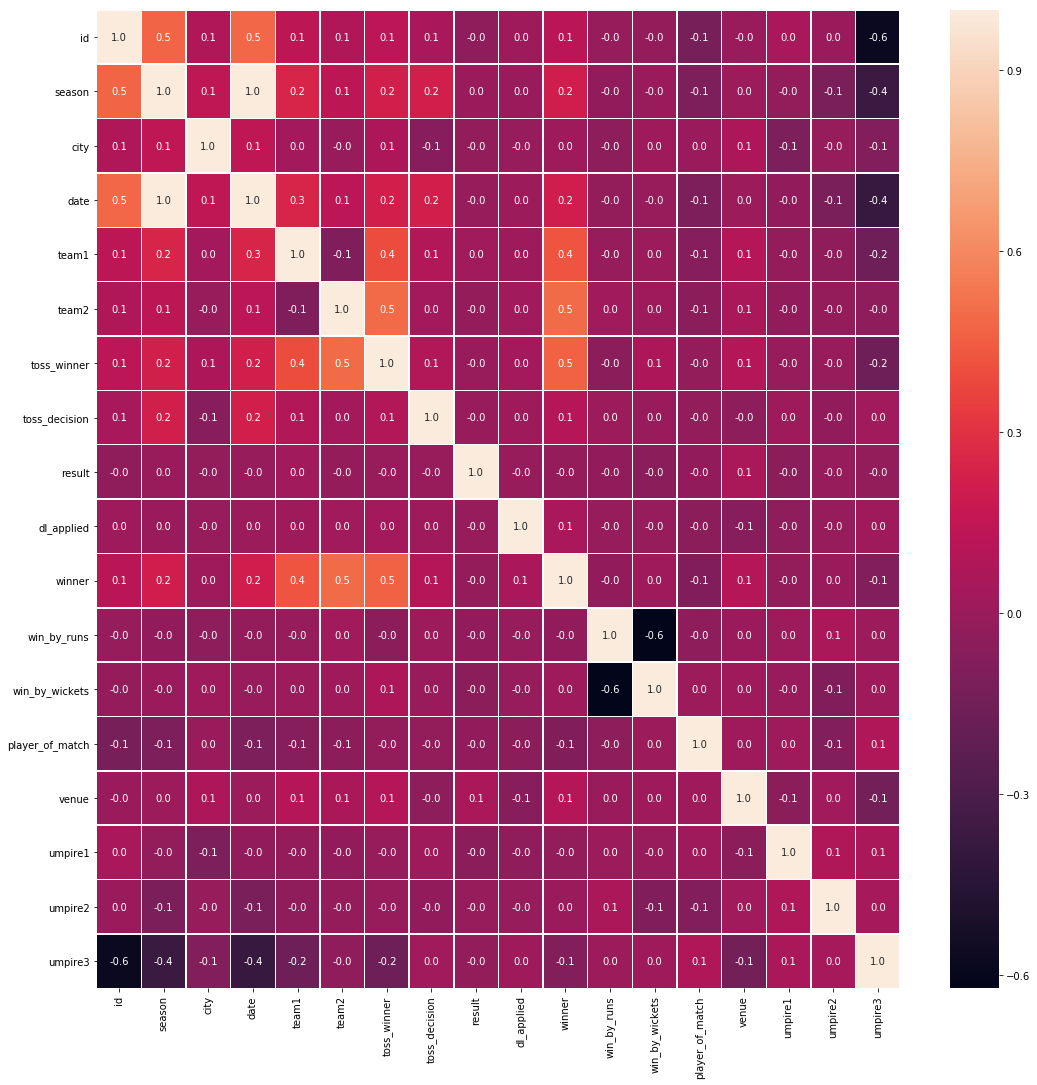

In [157]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [158]:
df1.head()

id  season  city  date  team1  team2  toss_winner  toss_decision  result  \
0   0       9    13   407     13     12           12              1       1   
1   1       9    24   408      7     10           10              1       1   
2   2       9    26   409      3      6            6              1       1   
3   3       9    14   410     10      4            4              1       1   
4   4       9     2   410     12      2           12              0       1   

   dl_applied  winner  win_by_runs  win_by_wickets  player_of_match  venue  \
0           0      13           35               0              199     23   
1           0      10            0               7              176     16   
2           0       6            0              10               30     25   
3           0       4            0               6               56     11   
4           0      12           15               0               84     14   

   umpire1  umpire2  umpire3  
0        5       23        0  
1        1       33      418  
2       27       11      419  
3        2        9      420  
4       44       45      421

In [159]:
df1 = df1.drop(['id'],axis=1)

# Dropping Features Like Umpire3 which is having Junk values

In [160]:
df1 = df1.drop(['umpire3'],axis=1)


In [161]:
df1.head()

season  city  date  team1  team2  toss_winner  toss_decision  result  \
0       9    13   407     13     12           12              1       1   
1       9    24   408      7     10           10              1       1   
2       9    26   409      3      6            6              1       1   
3       9    14   410     10      4            4              1       1   
4       9     2   410     12      2           12              0       1   

   dl_applied  winner  win_by_runs  win_by_wickets  player_of_match  venue  \
0           0      13           35               0              199     23   
1           0      10            0               7              176     16   
2           0       6            0              10               30     25   
3           0       4            0               6               56     11   
4           0      12           15               0               84     14   

   umpire1  umpire2  
0        5       23  
1        1       33  
2       27       11  
3        2        9  
4       44       45

# Plotting Graph to see which Features have a Major Impact  

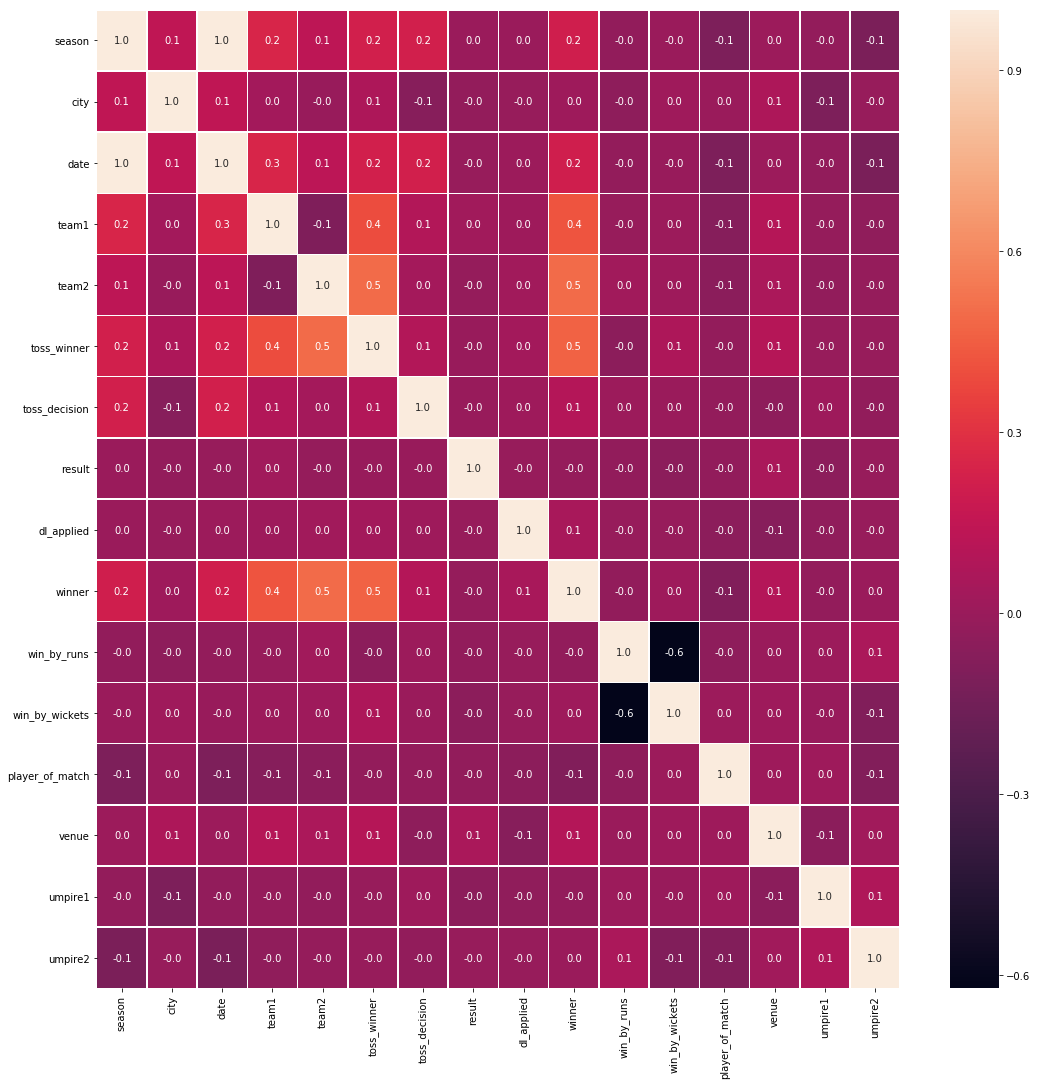

In [162]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [163]:
df1 = df1.drop(['umpire2'],axis=1)
df1 = df1.drop(['umpire1'],axis=1)

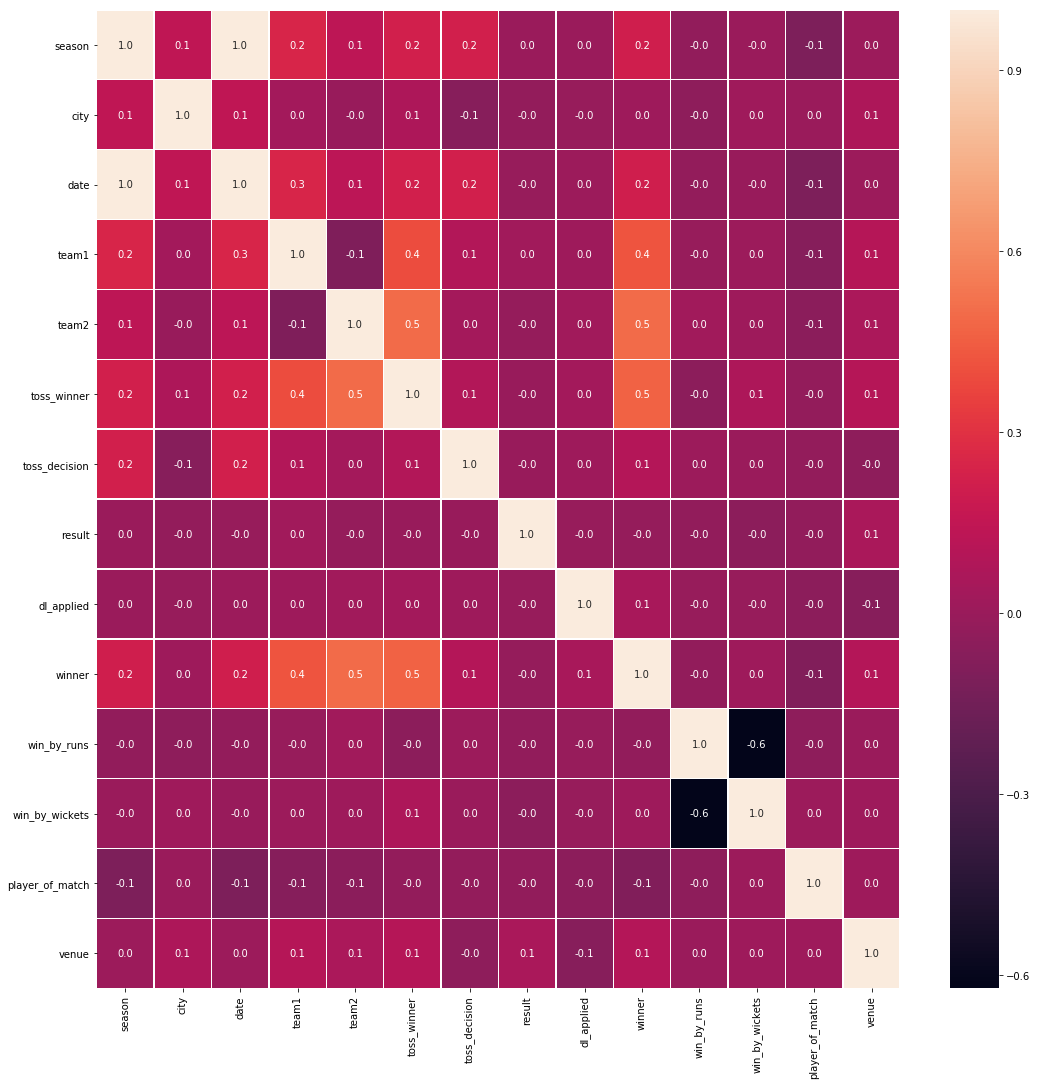

In [164]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 14 columns):
season             636 non-null int64
city               636 non-null int64
date               636 non-null int64
team1              636 non-null int64
team2              636 non-null int64
toss_winner        636 non-null int64
toss_decision      636 non-null int64
result             636 non-null int64
dl_applied         636 non-null int64
winner             636 non-null int64
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    636 non-null int64
venue              636 non-null int64
dtypes: int64(14)
memory usage: 69.6 KB


# Create Features and Labels Splits

In [166]:
X= df1.drop(['winner'], axis = 1)

X.head()

season  city  date  team1  team2  toss_winner  toss_decision  result  \
0       9    13   407     13     12           12              1       1   
1       9    24   408      7     10           10              1       1   
2       9    26   409      3      6            6              1       1   
3       9    14   410     10      4            4              1       1   
4       9     2   410     12      2           12              0       1   

   dl_applied  win_by_runs  win_by_wickets  player_of_match  venue  
0           0           35               0              199     23  
1           0            0               7              176     16  
2           0            0              10               30     25  
3           0            0               6               56     11  
4           0           15               0               84     14

In [167]:
y = df1['winner']
y.value_counts()

7     92
0     79
6     77
12    73
4     70
9     63
2     62
13    45
1     29
3     13
8     12
10    10
5      6
11     5
Name: winner, dtype: int64

In [168]:
pdx = pd.get_dummies(X, columns=X.columns, prefix = X.columns)

In [169]:
pdx.head()

season_0  season_1  season_2  season_3  season_4  season_5  season_6  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   season_7  season_8  season_9    ...     venue_25  venue_26  venue_27  \
0         0         0         1    ...            0         0         0   
1         0         0         1    ...            0         0         0   
2         0         0         1    ...            1         0         0   
3         0         0         1    ...            0         0         0   
4         0         0         1    ...            0         0         0   

   venue_28  venue_29  venue_30  venue_31  venue_32  venue_33  venue_34  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 874 columns]

# Adding Models

In [170]:
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier()))

models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


# Checking for Accuracy

In [171]:
results = []
names = []
for name,model in models:    
    cv_result = cross_val_score(model,pdx,y.ravel(), cv = 4,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 62.8924996941
K-Nearest Neighbour: 58.8241333215
Decision Tree: 84.6381492503
Random Forest: 73.1852535015
GradientBoostingClassifier: 96.7287619509
